In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties
from drawarrow import fig_arrow
from pyfonts import load_font

from highlight_text import fig_text, ax_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [59]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/europe.geojson"
world = gpd.read_file(url)
world.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180 71.51571, 180 70.8322, 178..."
1,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.6578 4.15623, -52.24934 3...."
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."


In [60]:
#url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/co2PerCapita.csv"
#df = pd.read_csv(url)


df = pd.read_csv('Countries_Isolates.csv')
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Total
0,Slovakia,7
1,Romania,10
2,Bulgaria,37
3,Czechia,279
4,Denmark,298


In [61]:
df.Country.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Slovakia', 'Romania', 'Bulgaria', 'Czechia', 'Denmark', 'Croatia',
       'Greece', 'Belgium', 'Ireland', 'Austria', 'Switzerland', 'Italy',
       'Hungary', 'Netherlands', 'Poland', 'Slovenia', 'Portugal',
       'Spain', 'Norway', 'Germany', 'France', 'Sweden'], dtype=object)

In [62]:
data = world.merge(df, how='left', left_on='name', right_on='Country')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
data.name.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Russia', 'Norway', 'France', 'Sweden', 'Belarus', 'Ukraine',
       'Poland', 'Austria', 'Hungary', 'Moldova', 'Romania', 'Lithuania',
       'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Albania',
       'Croatia', 'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands',
       'Portugal', 'Spain', 'Ireland', 'Italy', 'Denmark',
       'United Kingdom', 'Iceland', 'Slovenia', 'Finland', 'Slovakia',
       'Czechia', 'Bosnia and Herz.', 'North Macedonia', 'Serbia',
       'Montenegro', 'Kosovo'], dtype=object)

In [64]:
data = data[data['continent'] == 'Europe']

data = data[data['name'].isin(['Slovakia', 'Romania', 'Bulgaria', 'Czechia', 'Denmark',
       'Hungary', 'Greece', 'Belgium', 'Ireland', 'Austria', 'Switzerland',
       'Italy', 'Netherlands', 'Poland', 'Slovenia', 'Portugal', 'Spain',
       'Norway', 'Germany', 'France', 'Sweden', 'Croatia'])]

data = data[['name', 'Total', 'geometry']]
data = data.dropna()
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,Total,geometry
1,Norway,1032.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,France,2029.0,"MULTIPOLYGON (((-51.6578 4.15623, -52.24934 3...."
3,Sweden,2145.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
6,Poland,668.0,"POLYGON ((23.48413 53.9125, 23.52754 53.47012,..."
7,Austria,378.0,"POLYGON ((16.97967 48.1235, 16.90375 47.71487,..."
8,Hungary,596.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
10,Romania,10.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."
14,Germany,1661.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
15,Bulgaria,37.0,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."
16,Greece,322.0,"MULTIPOLYGON (((26.29 35.29999, 26.165 35.005,..."


In [65]:
adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'Norway': (-4, -5.5),
}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


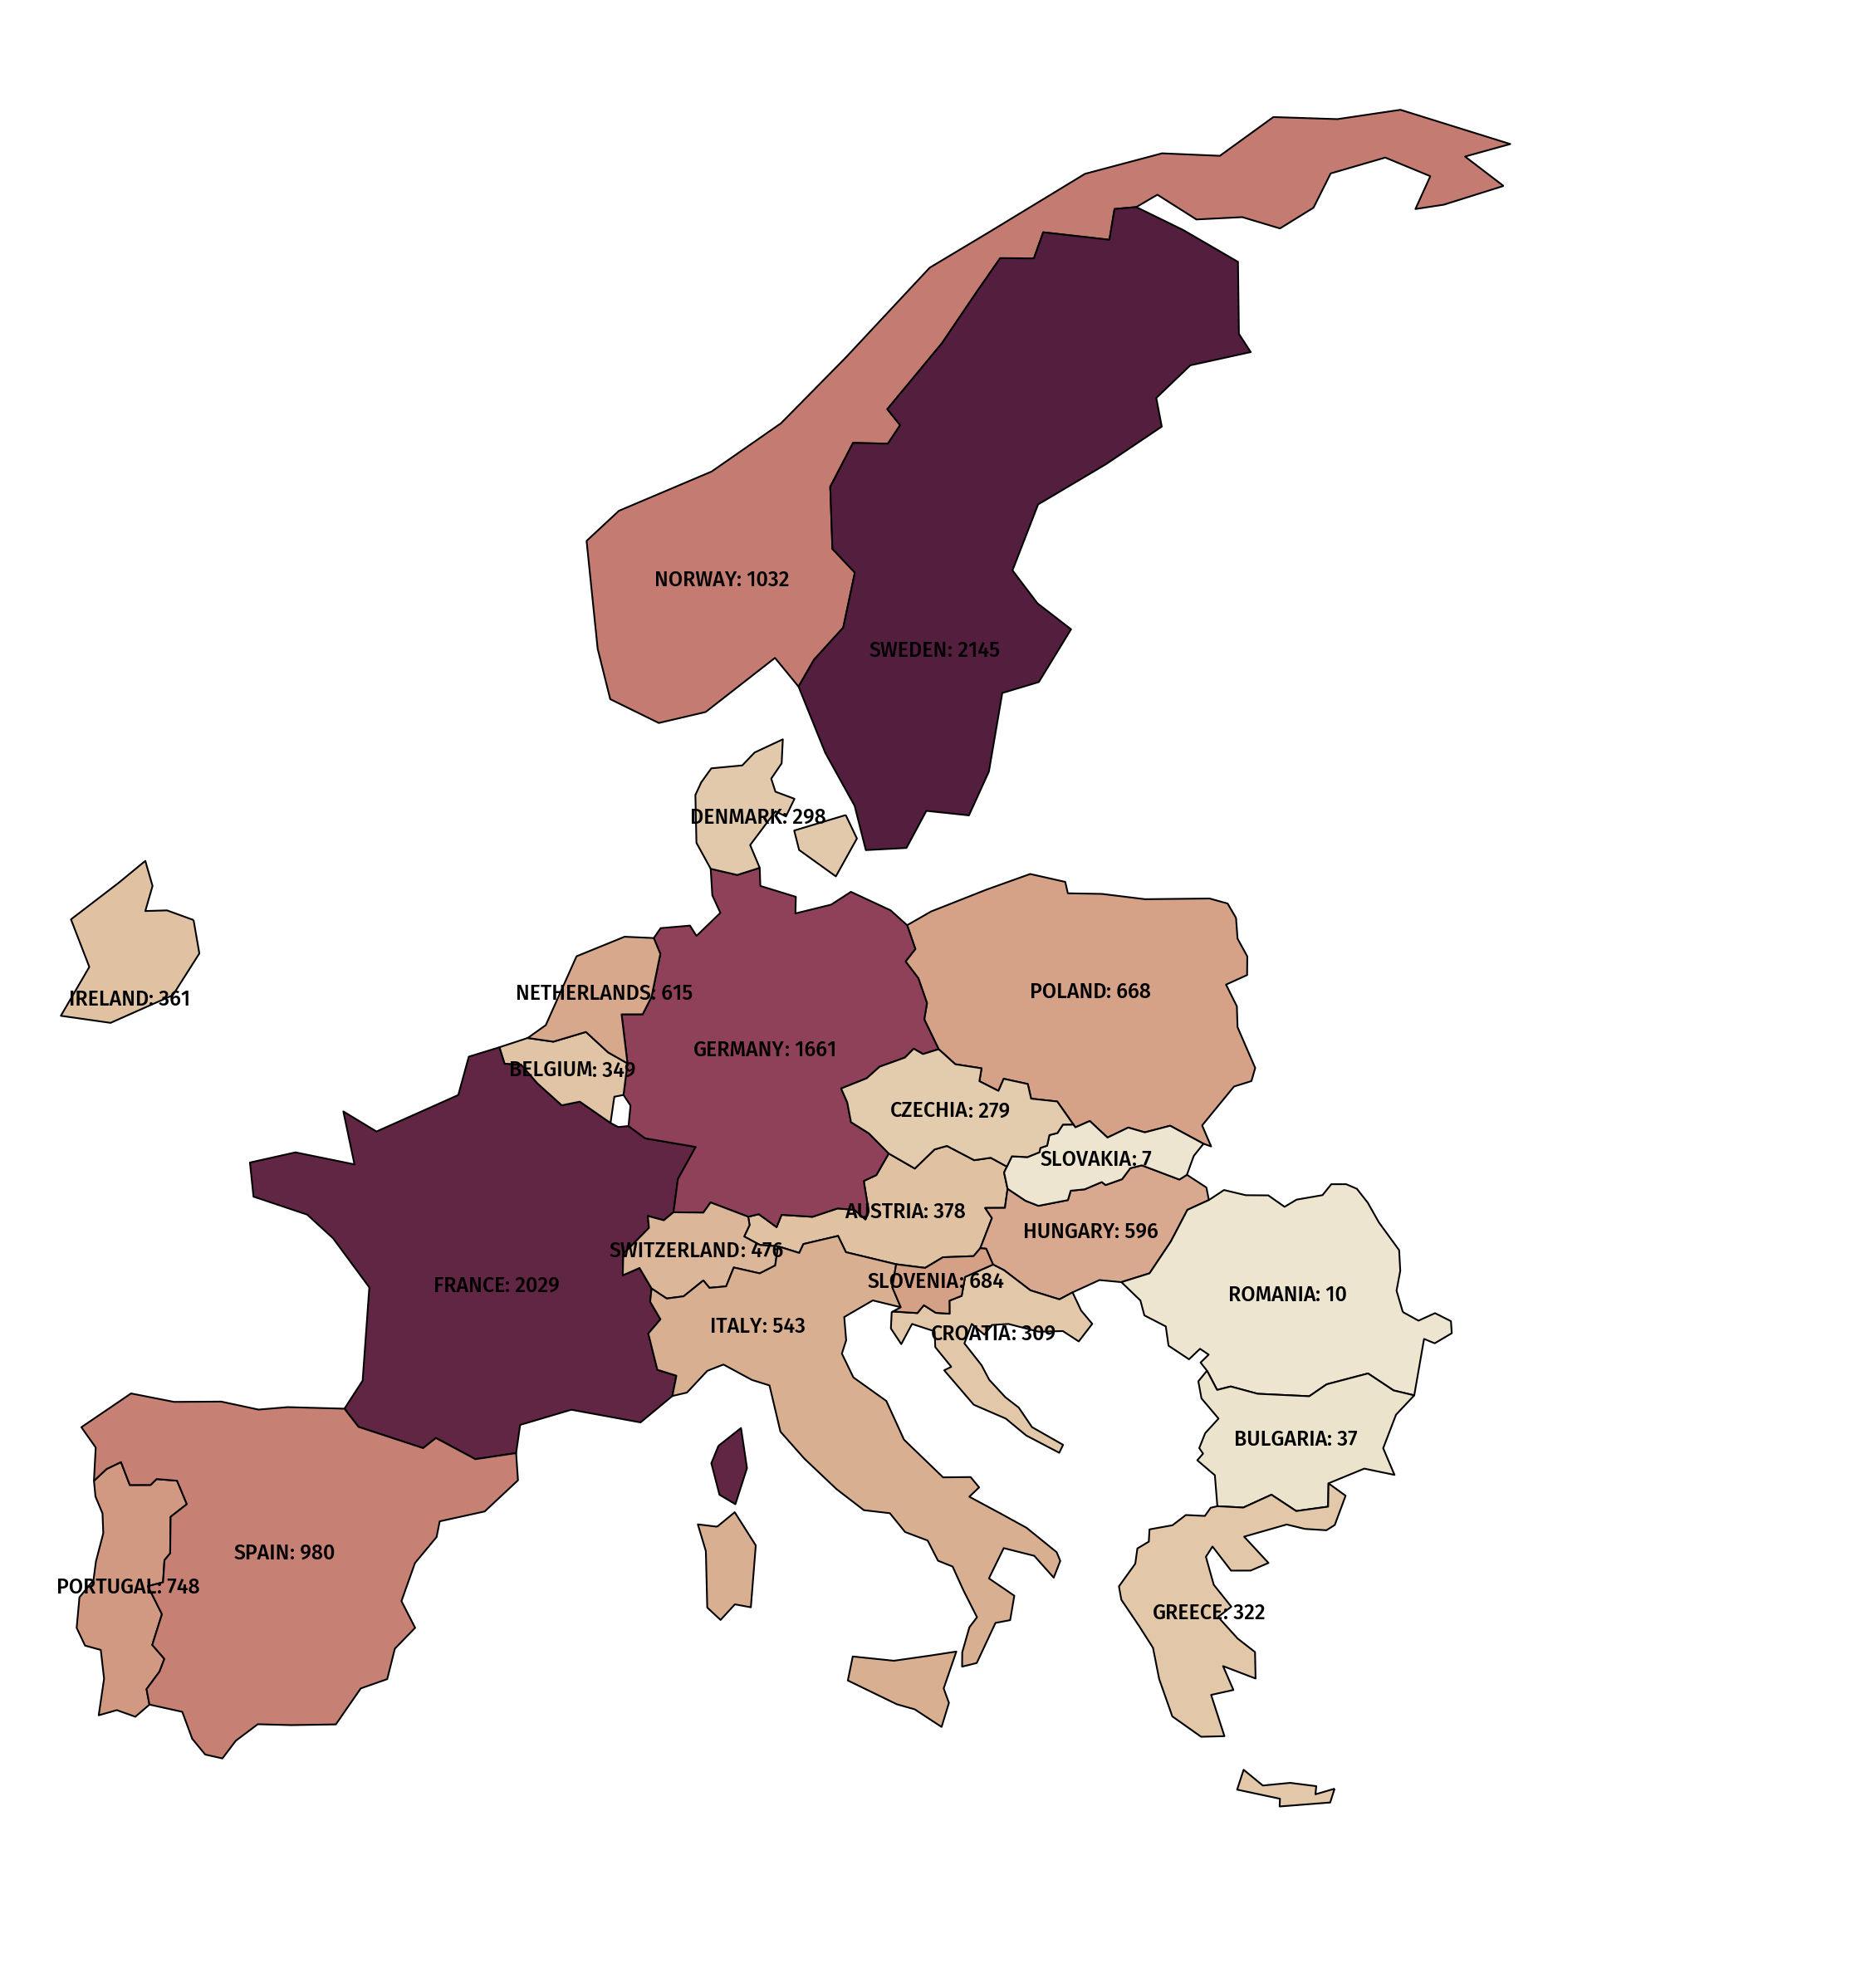

In [82]:
cmap = load_cmap('BrwnYl', cmap_type='continuous')
background_color = 'white'
text_color = 'black'


font = load_font(
   'https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2018)ByDhamraType/ttf/BebasNeue-Regular.ttf?raw=true'
)
other_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Light.ttf?raw=true'
)
other_bold_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Medium.ttf?raw=true'
)



fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()



data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

countries_to_annotate = [
       'Slovakia', 'Romania', 'Bulgaria', 'Czechia', 'Denmark',
       'Hungary', 'Greece', 'Belgium', 'Ireland', 'Austria', 'Switzerland',
       'Italy', 'Netherlands', 'Poland', 'Slovenia', 'Portugal', 'Spain',
       'Norway', 'Germany', 'France', 'Sweden', 'Croatia'
]

for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 70000:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.0f}", fontsize=6, font=other_bold_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

plt.savefig('isolates.png', dpi=300)
plt.show()